<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do MNIST classifier using numpy and python without CNN and just using plain neural networks. Parts covered in section:


*   Scaling the input - part F

In [0]:
import numpy as np
from tensorflow.keras.datasets import mnist

np.random.seed(1)

# loading the mnist data into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# getting the first 1000 data and reshaping the dataset for the first 1000
# scaling the input to 255
img, labels = (x_train[0:1000].reshape(1000,28*28) / 255), y_train[0:1000]

# creating an array of zeros 
one_hot_labels = np.zeros((len(labels), 10))


# assigning 1 to where the label would be for that particular array
# for example, if the array 
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

import sys, numpy as np

test_img = x_test.reshape(len(x_test), 28*28) / 255
test_label = np.zeros((len(y_test), 10))

for i,l in enumerate(y_test):
    test_label[i][l] = 1

## Do MNIST classifier using numpy and python without CNN and just using plain neural networks. Parts covered in section:


*   Mini batch - part A
*   Random weight initializations - part B
*   Using RELU activation function - part E
*   Using appropriate learning rate - part G
*   Testing and training accuracy | plotting results with confusion matrix - part H


## Mini batch
# Dropout mask, Random weight initalizations (Part A, B)

In [29]:
# setting up relu activation function
# would return x if x > 0, else return 0
relu = lambda x: (x>0) * x

# setting up backprop for relu
# returns 1 if input > 0, else return 0
relu2deriv = lambda x: x >= 0

# learning rate
alpha = 0.001

# number of iterations
iterations = 200

# hidden size
hidden = 100

# pixels per image 
pixels = 28 * 28

# number of labels
num_labels = 10

# batch size
batch_size = 100

# weights from layer 0 to 1
# initialize random weights
weights_0_1 = 0.2 * np.random.random((pixels, hidden)) - 0.1

# weights from layer 1 to 2
# initialize random weights
weights_1_2 = 0.2*np.random.random((hidden,num_labels)) - 0.1

# training
for j in range(iterations):
  error = 0.0
  correct_cnt = 0

  # iterating through each training image
  for i in range(int(len(img) / batch_size)):
    batch_start = i * batch_size
    batch_end = (i+1) * batch_size
    
    # layer 0
    layer_0 = img[batch_start : batch_end]
    # layer 1
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    # adding dropout mask
    dropout_mask = np.random.randint(2 , size=layer_1.shape)
    layer_1 *= dropout_mask * 2
    # layer 2
    layer_2 = np.dot(layer_1, weights_1_2)

    # MSE between the predicted and actual label value
    error += np.sum((labels[batch_start : batch_end] - layer_2) ** 2)

    for k in range(batch_size):

      # counting how many times the model predicts correctly
      correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_end+k+1]))

      # difference predicted and actual 
      layer_2_delta = (labels[batch_start:batch_end] - layer_2) / batch_size

      # backprop & adjusting weights
      # adding dropout mask
      layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
      layer_1_delta *= dropout_mask

      weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
      # print(weights_0_1)

  if (j%10 == 0):
    test_error = 0.0
    test_correct_cnt = 0

    for i in range(len(test_img)):
      layer_0 = test_img[i:i+1]
      layer_1 = relu(np.dot(layer_0, weights_0_1))
      layer_2 = np.dot(layer_1, weights_1_2)


      test_error += np.sum((test_label[i:i+1] - layer_2) ** 2)
      test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_label[i:i+1]))
  
    # print(test_error)
    sys.stdout.write("\n I:"+str(j)+ \
                     " Test-Error:" + str(test_error/ float(len(test_img)))[0:5] +\
                     " Test-Accuracy:" + str(test_correct_cnt/ float(len(test_img)))+\
                     " Train-Error:" + str(error/float(len(img)))[0:5] +\
                     " Train-Accuracy:" + str(correct_cnt/float(len(img))))
    # print(str(test_error/ float(len(test_img)))[0:5])


 I:0 Test-Error:0.817 Test-Accuracy:0.3742 Train-Error:1.274 Train-Accuracy:0.18
 I:10 Test-Error:0.550 Test-Accuracy:0.7394 Train-Error:0.587 Train-Accuracy:0.694
 I:20 Test-Error:0.493 Test-Accuracy:0.7747 Train-Error:0.520 Train-Accuracy:0.752
 I:30 Test-Error:0.469 Test-Accuracy:0.7867 Train-Error:0.495 Train-Accuracy:0.753
 I:40 Test-Error:0.454 Test-Accuracy:0.7891 Train-Error:0.472 Train-Accuracy:0.782
 I:50 Test-Error:0.450 Test-Accuracy:0.7894 Train-Error:0.456 Train-Accuracy:0.777
 I:60 Test-Error:0.445 Test-Accuracy:0.7874 Train-Error:0.449 Train-Accuracy:0.814
 I:70 Test-Error:0.445 Test-Accuracy:0.7821 Train-Error:0.439 Train-Accuracy:0.806
 I:80 Test-Error:0.451 Test-Accuracy:0.7805 Train-Error:0.440 Train-Accuracy:0.8
 I:90 Test-Error:0.452 Test-Accuracy:0.7796 Train-Error:0.429 Train-Accuracy:0.806
 I:100 Test-Error:0.448 Test-Accuracy:0.7789 Train-Error:0.439 Train-Accuracy:0.804
 I:110 Test-Error:0.445 Test-Accuracy:0.7865 Train-Error:0.428 Train-Accuracy:0.819
 I:12

In [29]:
# setting up relu activation function
# would return x if x > 0, else return 0
relu = lambda x: (x>0) * x

# setting up backprop for relu
# returns 1 if input > 0, else return 0
relu2deriv = lambda x: x >= 0

# learning rate
alpha = 0.001

# number of iterations
iterations = 200

# hidden size
hidden = 100

# pixels per image 
pixels = 28 * 28

# number of labels
num_labels = 10

# batch size
batch_size = 100

# weights from layer 0 to 1
# initialize random weights
weights_0_1 = 0.2 * np.random.random((pixels, hidden)) - 0.1

# weights from layer 1 to 2
# initialize random weights
weights_1_2 = 0.2*np.random.random((hidden,num_labels)) - 0.1

test_err_np = np.array([])
test_acc_np = np.array([])
train_err_np = np.array([])
train_acc_np = np.array([])

# training
for j in range(iterations):
  error = 0.0
  correct_cnt = 0
 
  # iterating through each training image
  for i in range(int(len(img) / batch_size)):
    batch_start = i * batch_size
    batch_end = (i+1) * batch_size
    
    # layer 0
    layer_0 = img[batch_start : batch_end]
    # layer 1
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    # adding dropout mask
    dropout_mask = np.random.randint(2 , size=layer_1.shape)
    layer_1 *= dropout_mask * 2
    # layer 2
    layer_2 = np.dot(layer_1, weights_1_2)

    # MSE between the predicted and actual label value
    error += np.sum((labels[batch_start : batch_end] - layer_2) ** 2)

    for k in range(batch_size):

      # counting how many times the model predicts correctly
      correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_end+k+1]))

      # difference predicted and actual 
      layer_2_delta = (labels[batch_start:batch_end] - layer_2) / batch_size

      # backprop & adjusting weights
      # adding dropout mask
      layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
      layer_1_delta *= dropout_mask

      weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
      # print(weights_0_1)

  
  if (j%10 == 0):
    test_error = 0.0
    test_correct_cnt = 0

    for i in range(len(test_img)):
      layer_0 = test_img[i:i+1]
      layer_1 = relu(np.dot(layer_0, weights_0_1))
      layer_2 = np.dot(layer_1, weights_1_2)


      test_error += np.sum((test_label[i:i+1] - layer_2) ** 2)
      test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_label[i:i+1]))
      
    test_err_np = np.append(test_np, [test_error/ float(len(test_img))])
    test_acc_np = np.append(test_acc_np, [test_correct_cnt / float(len(test_img))])
    train_err_np = np.append(train_err_np, [error/float(len(img))])
    train_acc_np = np.append(train_acc_np, [correct_cnt/float(len(img))])
    sys.stdout.write("\n I:"+str(j)+ \
                     " Test-Error:" + str(test_error/ float(len(test_img)))[0:5] +\
                     " Test-Accuracy:" + str(test_correct_cnt/ float(len(test_img)))+\
                     " Train-Error:" + str(error/float(len(img)))[0:5] +\
                     " Train-Accuracy:" + str(correct_cnt/float(len(img))))
    # print(str(test_error/ float(len(test_img)))[0:5])


 I:0 Test-Error:0.812 Test-Accuracy:0.3883 Train-Error:1.241 Train-Accuracy:0.176
 I:10 Test-Error:0.573 Test-Accuracy:0.7056 Train-Error:0.613 Train-Accuracy:0.662
 I:20 Test-Error:0.515 Test-Accuracy:0.7495 Train-Error:0.542 Train-Accuracy:0.73
 I:30 Test-Error:0.481 Test-Accuracy:0.7781 Train-Error:0.512 Train-Accuracy:0.746
 I:40 Test-Error:0.465 Test-Accuracy:0.7951 Train-Error:0.494 Train-Accuracy:0.767
 I:50 Test-Error:0.452 Test-Accuracy:0.8021 Train-Error:0.472 Train-Accuracy:0.773
 I:60 Test-Error:0.445 Test-Accuracy:0.8009 Train-Error:0.455 Train-Accuracy:0.784
 I:70 Test-Error:0.440 Test-Accuracy:0.8015 Train-Error:0.451 Train-Accuracy:0.782
 I:80 Test-Error:0.448 Test-Accuracy:0.7929 Train-Error:0.452 Train-Accuracy:0.798
 I:90 Test-Error:0.452 Test-Accuracy:0.7927 Train-Error:0.443 Train-Accuracy:0.792
 I:100 Test-Error:0.452 Test-Accuracy:0.7965 Train-Error:0.448 Train-Accuracy:0.794
 I:110 Test-Error:0.448 Test-Accuracy:0.7948 Train-Error:0.441 Train-Accuracy:0.797
 I:

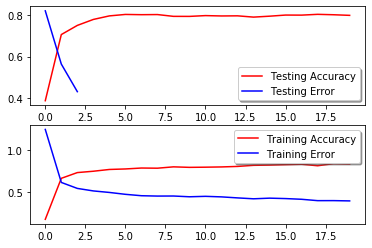

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
ax[0].plot(test_acc_np, color='r', label="Testing Accuracy")
ax[0].plot(test_err_np, color='b', label="Testing Error")
legend = ax[0].legend(loc='best', shadow=True)


ax[1].plot(train_acc_np, color='r', label="Training Accuracy")
ax[1].plot(train_err_np, color='b', label="Training Error")
legend = ax[1].legend(loc='best', shadow=True)


In [0]:
# Confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

c) The code should do basic image augmentations to supplement the training data (not testing data) using keras libraries  (NEW than the deck) - see the image augmentations tried in https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

d) The code should use  3 or more layers for training (not 2 as in example ) - you have to tune and pick number of neurons in your layer and number of layers



i) The code should display top common errors like in below link.